## LAB SESSION: Perform Classification Task by using K-Nearest Neighbour with Python

In this lab, we are going to explore the Teaching Assistant Evaluation (TAE) dataset. A model will be trained after that to decide what evaluation catogory a teaching assistant (TA) would get. 

The data set is freely available from: http://archive.ics.uci.edu/ml/datasets/Teaching+Assistant+Evaluation. 

## Phase 1: Business Understanding 

1. Determine Business Objective
    - Key persons and their roles. Who are the project sponsors and domain experts. 
    - Users needs and expectation.
    - Problems that wants to be solved. 
2. Assess Situation
    - Identify software and hardware available.
    - Identify the relavant background.
3. Determine data mining goals
    - Define your goals.
    - Specify data mining problem type (classification, prediction, clustering) .
    - Specify criteria for model assessment.
4. Produce project plan
    - Define initial process plan. 

## Phase 2: Data Understanding

1. Collect data
    - (Download the dataset and open in excel)
2. Describe data
    - (Understand the description)
3. Explore data
    - (Cover at the following)
4. Verify the quality data
    - Check for missing value, invalid value, range, unit

In [1]:
import pandas as pd

# Import the dataset
df = pd.read_csv('tae.data')

In [2]:
# Show the import dataset (Only in notebook)
df

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
5,2,9,5,2,19,3
6,2,10,3,2,27,3
7,1,22,3,1,58,3
8,2,15,3,1,20,3
9,2,10,22,2,9,3


In [3]:
# Show only 10 rows of entire dataset
df.head(10)

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
5,2,9,5,2,19,3
6,2,10,3,2,27,3
7,1,22,3,1,58,3
8,2,15,3,1,20,3
9,2,10,22,2,9,3


In [4]:
# Show only 5 rows of entire dataset (default)
df.head()

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [5]:
# Add the coloumn names into the dataset
colNames = ['NativeSpeaker', 'CourseInstructor', 'Course','Semester',
            'ClassSize','ClassAttribute']

# read again to put the column headers of the data
df = pd.read_csv('tae.data', names=colNames)

df.head(10)

,NativeSpeaker,CourseInstructor,Course,Semester,ClassSize,ClassAttribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


In [6]:
# Get tha shape/dimension of dataset
df.shape

(151, 6)

In [7]:
#Know more information about the datatset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
NativeSpeaker       151 non-null int64
CourseInstructor    151 non-null int64
Course              151 non-null int64
Semester            151 non-null int64
ClassSize           151 non-null int64
ClassAttribute      151 non-null int64
dtypes: int64(6)
memory usage: 7.2 KB


In [8]:
df.describe()

,NativeSpeaker,CourseInstructor,Course,Semester,ClassSize,ClassAttribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [9]:
# Check the missing values by alternative approach  
df.isnull().sum()

NativeSpeaker       0
CourseInstructor    0
Course              0
Semester            0
ClassSize           0
ClassAttribute      0
dtype: int64

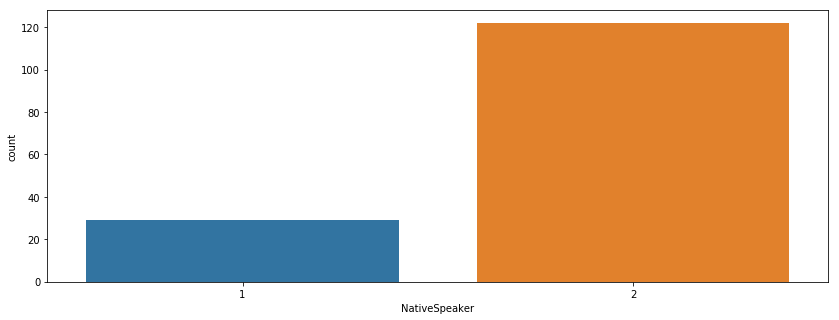

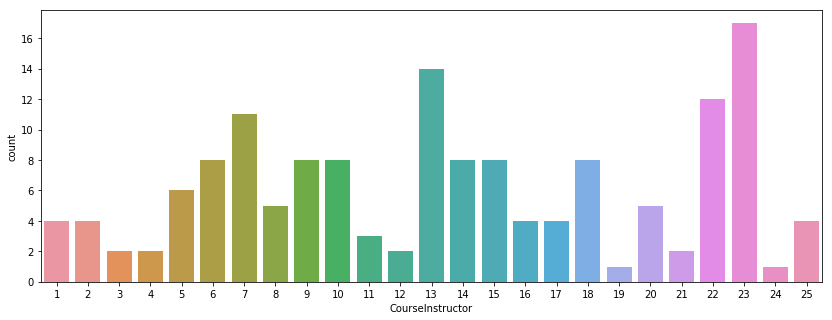

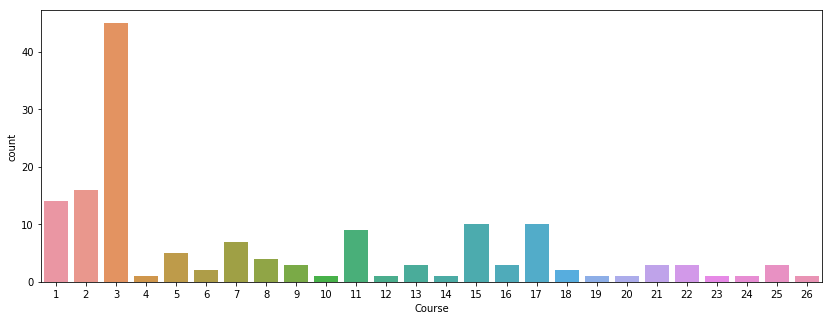

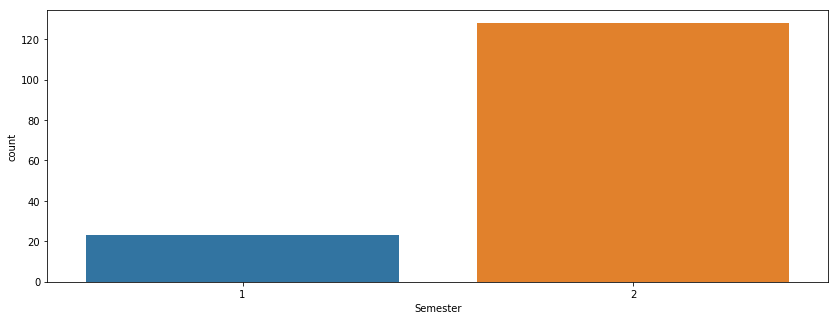

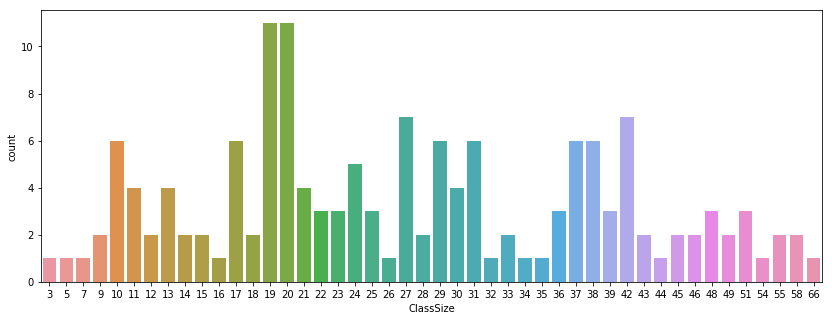

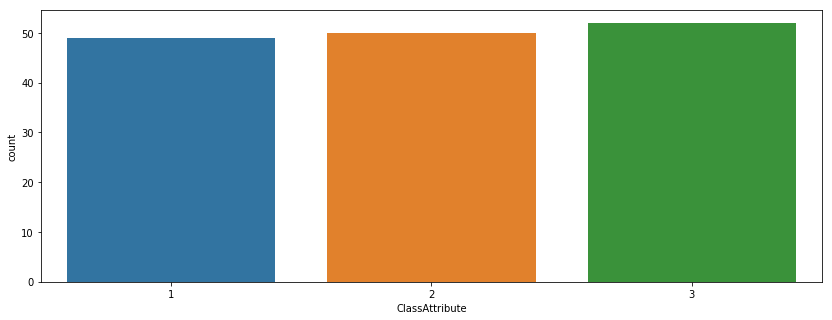

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#To display the histogram for each feature
for i in colNames:
    plt.figure(figsize=(14, 5))
    sns.countplot(x=i, data=df)
    plt.show()

## Phase 3: Data Preparation

1. Remove the missing and invalid values from the dataset.
    - Removed the unwanted or invalid values.
    - Replace the missing and invalid values with more suitable values (Mode, Mean, Median).
    - Convert Numerical into Catogorical values.
2. Transform the dataset
    - Tranform variable with log.
    - Conversion between numerical and catogorical values.
3. Split the dataset into training and testing datasets.

In [11]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

# Split the dataset into training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state = 0)

## Phase 4 and 5: Modeling and Evaluation

The optimal number of neighbors is 1
The optimal score is 0.48


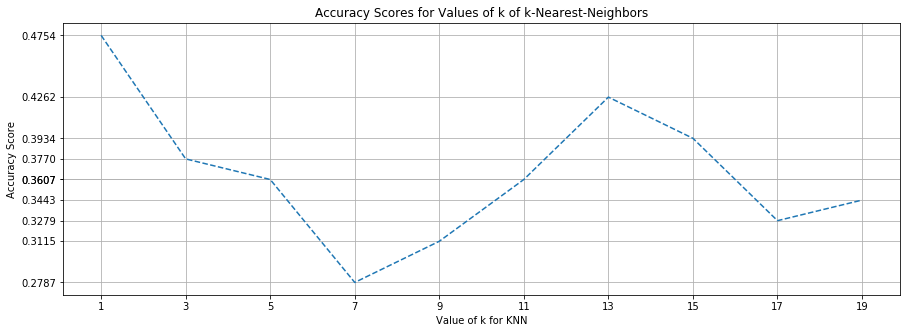

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

# Default KNN configuration 
# Without cross validation
scores=[]
lrange=list(range(1, 20, 2))

for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
optimal_k=lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2, figsize=(15,5))

plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(lrange)
plt.yticks(scores)

plt.grid()
plt.show()

The optimal number of neighbors is 1
The optimal score is 0.55


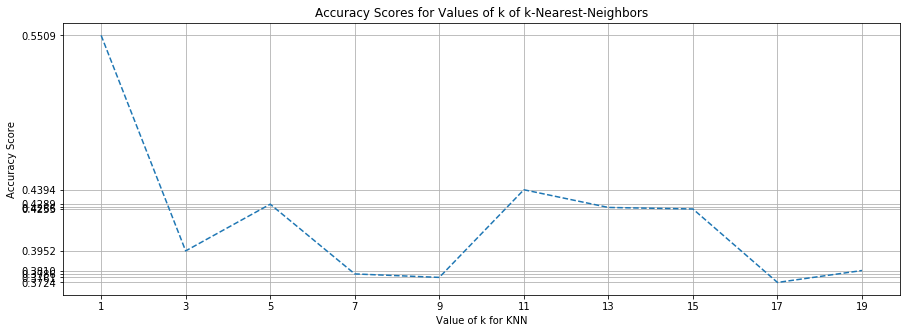

In [13]:
from sklearn.model_selection import cross_val_score

scores=[]
lrange=list(range(1, 20, 2))

# Default KNN configuration 
# With 10 fold cross validation
for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())
    
optimal_k=lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2, figsize=(15,5))

plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(lrange)
plt.yticks(scores)

plt.grid()
plt.show()

The optimal number of neighbors is 9
The optimal score is 0.51


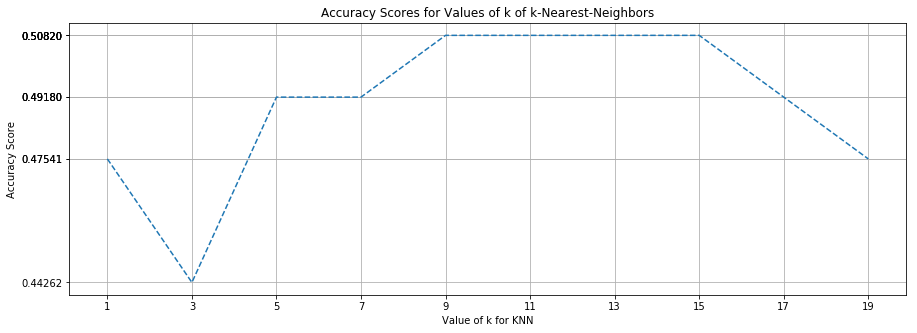

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

# Custom KNN configuration (weights is set to be "distance and algorithm is set to be "auto)
# Without cross validation
scores=[]
lrange=list(range(1, 20, 2))

for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k, weights="distance", algorithm="auto")
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
optimal_k=lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2, figsize=(15,5))

plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(lrange)
plt.yticks(scores)

plt.grid()
plt.show()

The optimal number of neighbors is 9
The optimal score is 0.57


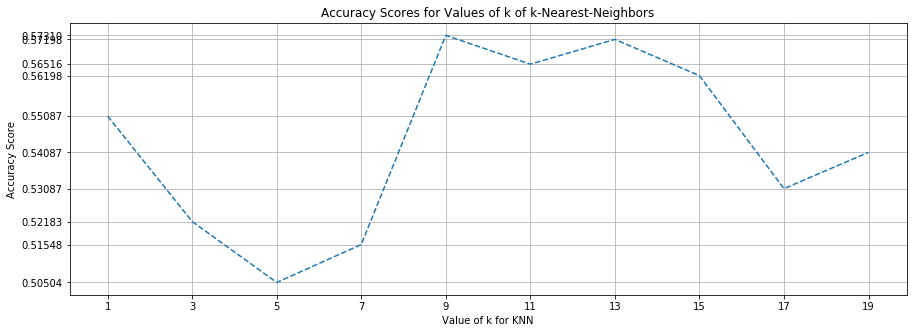

In [15]:
from sklearn.model_selection import cross_val_score

scores=[]
lrange=list(range(1, 20, 2))

# Custom KNN configuration (weights is set to be "distance and algorithm is set to be "auto) 
# With 10 fold cross validation
for k in lrange:
    knn=KNeighborsClassifier(n_neighbors=k, weights="distance", algorithm="auto")
    score=cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())
    
optimal_k=lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2, figsize=(15,5))

plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.xticks(lrange)
plt.yticks(scores)

plt.grid()
plt.show()